Программа интерполирует **(x(t), y(t))** на равномерной сетке <br>
В качестве новых точек используются точки от нажатия мышки. <br>
Интерполяция начинается после добавления 4-ой точки. <br>
В программе для интерполирования двумерной параметрической функции <br>
использовались функции из библиотеки scipy.interpolate

In [1]:
%matplotlib notebook

In [2]:
import sys
import random
import numpy as np
from scipy.interpolate import splprep, splev

from PyQt5 import QtCore, QtWidgets, QtGui

import matplotlib
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg, NavigationToolbar2QT as NavigationToolbar
from matplotlib.figure import Figure


class Canvas(FigureCanvasQTAgg):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        fig.suptitle('Двумерная интерполяция на PyQt')
        super(Canvas, self).__init__(fig)


class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.canvas = Canvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)
        self.canvas.mpl_connect('button_press_event', self.mouse_click)

        self.xdata = np.array([])       # эти массивы хранят только точки, добавленные мышкой
        self.ydata = np.array([])

        self.updated_xdata = np.array([]) # эти массивы хранят интерполированные значения
        self.updated_ydata = np.array([])

        self.update_plot()

        toolbar = NavigationToolbar(self.canvas, self) # Следующий код предназначен для панели инструментов

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(toolbar)
        layout.addWidget(self.canvas)

        widget = QtWidgets.QWidget()
        widget.setLayout(layout)
        self.setCentralWidget(widget)

        self.show()



    def update_plot(self):                  # Обновление графика
        self.canvas.axes.cla()
        self.canvas.axes.axis([-100, 100, -100, 100])
        self.canvas.axes.plot(self.xdata, self.ydata, 'rx--', label='Линейная', linewidth=0.5)
        self.canvas.axes.plot(self.updated_xdata, self.updated_ydata, 'b', label='Сплайновая')
        self.canvas.axes.set(xlabel='X(t)', ylabel='Y(t)')
        self.canvas.axes.legend()
        self.canvas.draw()



    def mouse_click(self, event):               # Обработка нажатия мышкой на полотно
        ix, iy = event.xdata, event.ydata   # Считывание координат точки нажатия
        print('x=%f,y=%f'%(ix, iy))
        self.xdata = np.append(self.xdata, [ix])   # Добавление координат новой точки
        self.ydata = np.append(self.ydata, [iy])

        if len(self.xdata) > 3:        # Функция интерполирования начинает работу, имея 4 точки
            tck, u = splprep([self.xdata, self.ydata], s=0, k=3)
            u_new = np.linspace(u.min(), u.max(), 1000)
            x_new, y_new = splev(u_new, tck, der=0)

            self.updated_xdata = x_new.copy()
            self.updated_ydata = y_new.copy()

        self.update_plot()




app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec_()

0

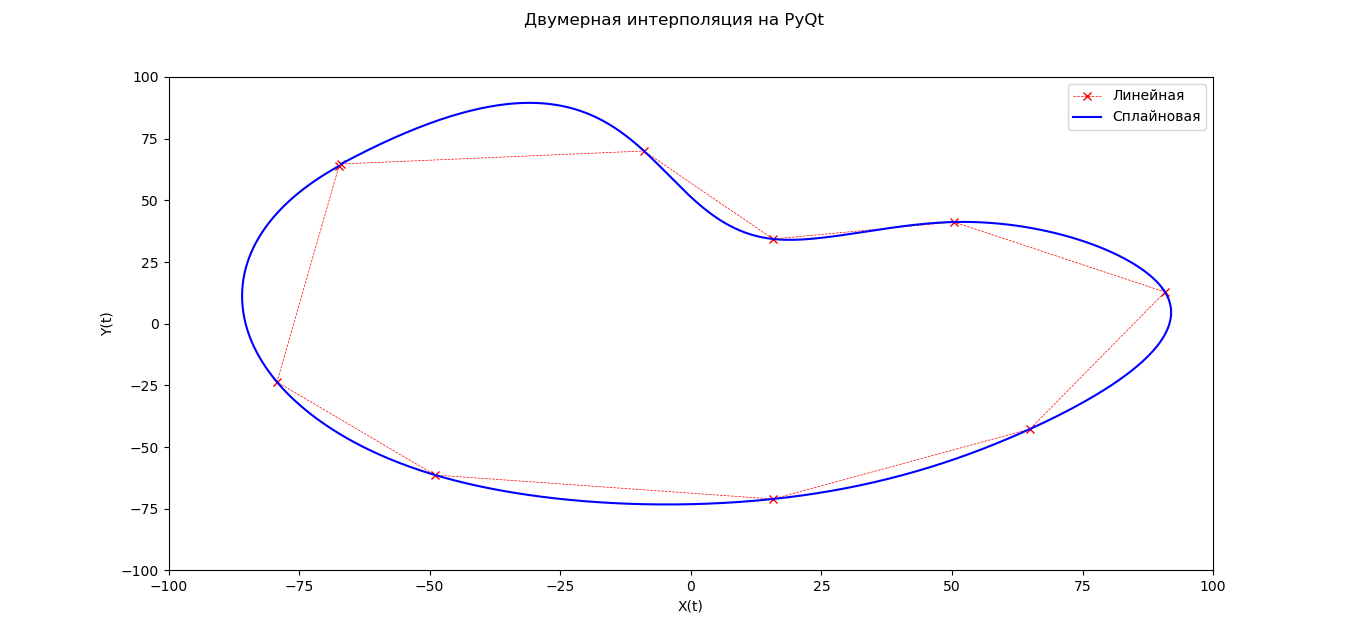

x=-8.707763,y=1.568369 <br>
x=-6.046712,y=4.445367 <br>
x=-3.366517,y=4.891100 <br>
x=-0.896908,y=1.933059 <br>
x=-2.677324,y=-2.159572 <br>
x=-4.036566,y=-0.052475 <br>
x=3.295683,y=3.351298 <br>
x=6.588494,y=2.905566 <br>

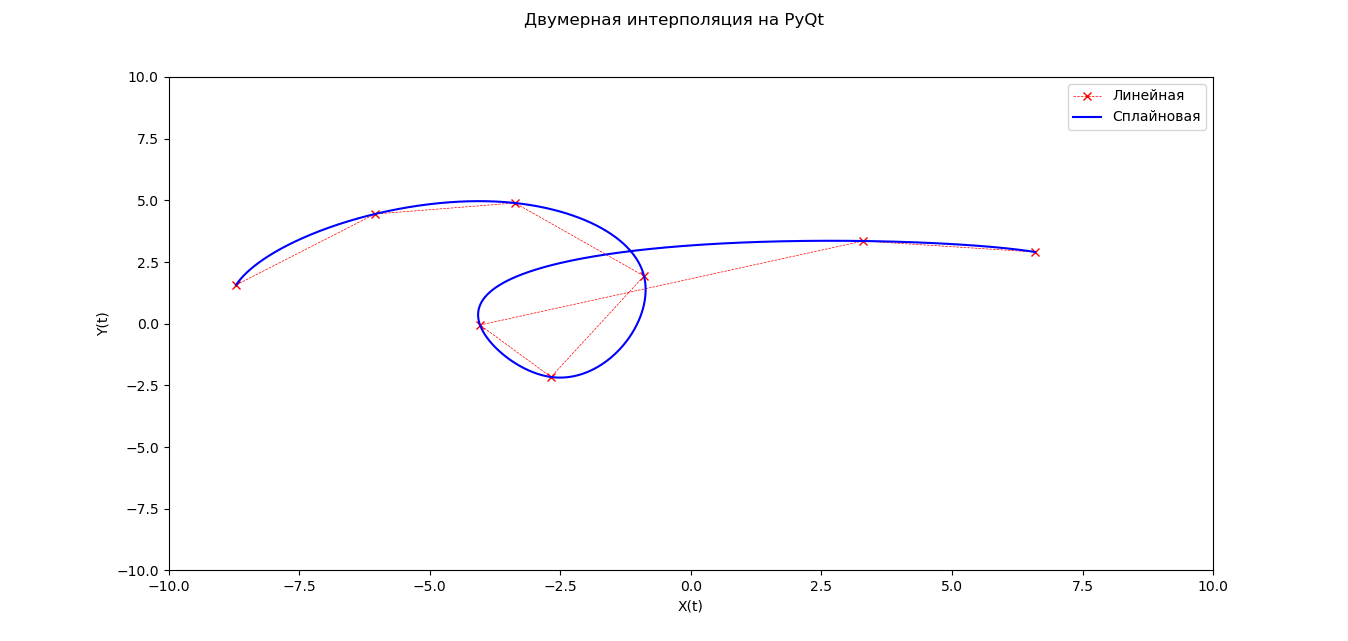